## Quantum Reservoir Computing for Chaotic Dynamics
FYP Masters project by Raihaan Usman

In [5]:
from backend.solver import Lorentz, MFE
from backend import CRCM, QRCM

import numpy as np
import os;  os.environ["OMP_NUM_THREADS"] = '32' # Imposes cores

#### Configuration for Lorentz system

In [6]:
# Data generation parameters
dim             = 3
upsample        = 1                     # To increase the dt of the ESN wrt the numerical integrator
dt              = 0.005 * upsample      # Time step
params          = [8/3, 28, 10]         # Parameters for the Lorenz system

# Define N for washout, training, validation and testing
N_washout       = 50
N_train         = 300
N_test          = 50
N_sets          = [N_washout, N_train, N_test]

#### CRCM for Lorenz system

In [7]:
# # Initialise the ESN
# crcm = CRCM(dim=dim,
#             N_units=200,
#             connectivity=3,
#             seed=0)

# # Train the ESN with the training data
# crcm.train(data)

#### QRCM for Lorenz system

Test: 100%|██████████| 49/49 [00:00<00:00, 67.46it/s]



Train/test with 300/50 samples
Using n = 2 qubits and epsilon = 0.01

Training MSE: 31.42162840136678
Time taken: 6.488029956817627


Closed Loop: 100%|██████████| 49/49 [00:00<00:00, 71.64it/s]


IndexError: index 3 is out of bounds for axis 1 with size 3

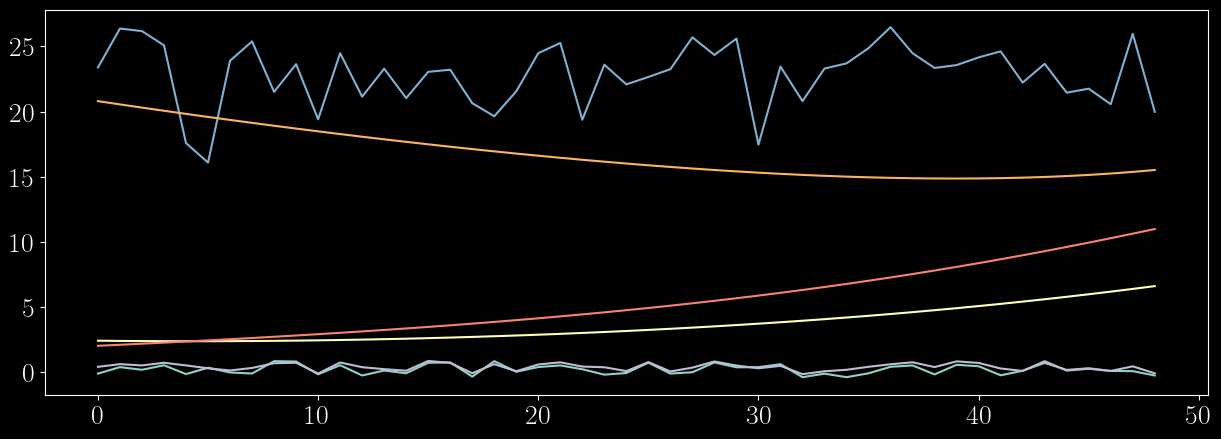

In [8]:
# Instantiate the solver object
lor3 = Lorentz(params, dt, N_sets)

# Instantiate the QRCM object
qrcm = QRCM(solver  = lor3,
            qubits  = 2,
            eps     = 0.01,
            tik     = 1e-6)

# Train the QRCM with the training data
qrcm.train(override=True)
qrcm.forward()